In [75]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def hour_to_decimal(hour: str) -> float:
    digits = hour.split(':')
    return int(digits[0]) + int(digits[1]) / 60.0 + int(digits[2]) / 6000.0

def histogram(column, header, xlabel, ylabel='Frequency'):
    plt.hist(column, bins=50, rwidth=0.85, color='#0504aa')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(header)
    plt.show()


path = '../data/2019_M_%.csv'
data = pd.read_csv(path, delimiter=';')
data['Finish_decimal'] = data['Finish'].apply(hour_to_decimal)
data.head()

,Place,Pl.AC,Name,Number,AC,Club,Finish,Finish_decimal
0,1,1,"Gröschel, Tom (GER)",20623,HK,Tc Fiko Rostock,01:05:25,1.087500
1,2,2,"Weldaj, Haftom (GER)",24434,HK,TSV Pattensen,01:06:22,1.103667
2,3,3,"Karsch, Dustin (GER)",24722,HK,Osnabrücker TB,01:09:08,1.151333
3,4,4,"Riechers, Nicolai (GER)",24698,HK,Osnabrücker TB,01:09:09,1.151500
4,5,1,"Knutzen, Jan (GER)",25738,30,SG akquinet Lemwerder,01:09:58,1.159667


In [76]:
data.tail()

,Place,Pl.AC,Name,Number,AC,Club,Finish,Finish_decimal
5592,5593,5,"Dr. Kloweit-Herrmann, Manfred (GER)",26710,80,SC Melle 03,03:15:40,3.256667
5593,5594,197,"Kaletsch, Heinz (GER)",25441,60,Artiva Athletix Team,03:19:16,3.319333
5594,5595,198,"Marzian, Wolfgang (GER)",23362,60,keiner,03:20:49,3.341500
5595,5596,476,"Fuhlenriede, Armin (GER)",24973,55,Hannover Runners e. V.,03:31:59,3.526500
5596,5597,762,"Schönfeld, Robert (GER)",24680,50,Sport mit Depressionen,03:36:06,3.601000


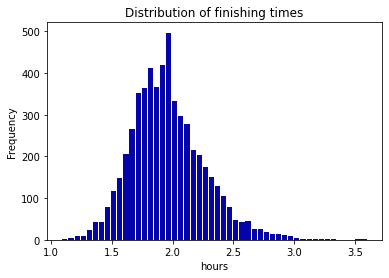

In [77]:
histogram(data['Finish_decimal'], 'Distribution of finishing times', 'hours')

In [78]:
data.groupby('AC').mean()

,Place,Finish_decimal
AC,,
30,2662.113054,1.930523
35,2542.425756,1.916884
40,2688.408618,1.940968
45,2849.163833,1.974180
50,2881.569554,1.979186
55,3186.995798,2.030036
60,3410.762626,2.087944
65,3832.183908,2.156822
70,4145.941176,2.233108


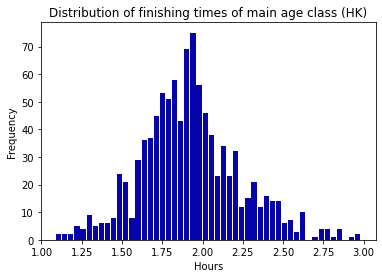

In [81]:
main_age_class = data[data['AC'] == 'HK']
histogram(main_age_class['Finish_decimal'], 'Distribution of finishing times of main age class (HK)', 'Hours')

In [80]:
data['AC'] = data['AC'].map(lambda x: x.strip())
data['AC_label'] = data['AC']
data['AC_label'] = data.AC.replace({
    '–': -1,
    'JU18': 0,
    'JU20': 1,
    'HK': 2,
    '30': 3,
    '35': 4,
    '40': 5,
    '45': 6,
    '50': 7,
    '55': 8,
    '60': 9,
    '65': 10,
    '70': 11,
    '75': 12,
    '80': 13,
    'M85': 14,
})
data.dtypes
data.corr()

,Place,Finish_decimal,AC_label
Place,1.000000,0.956946,0.147725
Finish_decimal,0.956946,1.000000,0.159629
AC_label,0.147725,0.159629,1.000000
